**Import yang diperlukan**

In [ ]:
import pandas as pd 
import requests 
from bs4 import BeautifulSoup 
import re
from datetime import timedelta, date
import timeit


In [ ]:
#FINAL

#SKENARIO 1 GAGAL KARENA GA VALID LOOPINGNYA UNTUK TANGGAL

# list_url_20192020 = []
# for n in range(19,21): #tahun 2019 - tahun 2020
#   for i in range(9,13): #bulan september - bulan desember
#     for b in range(1,32): #hari ke-1 sampai hari ke-31
#       alamat = "http://www.duniainvestasi.com/bei/prices/daily/20"+str("%02d"%(n))+str("%02d"%(i))+str("%02d"%(b))
#       response=requests.get(alamat)
#       data_html = BeautifulSoup(response.text, 'html.parser')
#       tabel_stocks = data_html.find('table')
#       if len(data_html.find_all("table")) > 0:
#         print("Ketemu Datanya {} !".format(alamat))
#         list_url_20192020.append(alamat)
#       else:
#         continue  

In [ ]:
#Pertama kumpul tanggal2 
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

list_tanggal = []
start_date = date(2019, 9, 1)
end_date = date(2020, 12, 31)
for single_date in daterange(start_date, end_date):
    # print(single_date.strftime("%Y%m%d"))
    list_tanggal.append(single_date.strftime("%Y%m%d"))

In [ ]:
#SKENARIO 2 #FIX VALID!
 
list_url_20192020 = []
for i in list_tanggal:
  alamat = "http://www.duniainvestasi.com/bei/prices/daily/"+i
  response=requests.get(alamat)
  data_html = BeautifulSoup(response.text, 'html.parser')
  tabel_stocks = data_html.find('table')
  if len(data_html.find_all("table")) > 0:
    print("Ketemu Datanya {} !".format(alamat))
    list_url_20192020.append(alamat)
  else:
    continue

Ketemu Datanya http://www.duniainvestasi.com/bei/prices/daily/20190902 !
Ketemu Datanya http://www.duniainvestasi.com/bei/prices/daily/20190903 !
Ketemu Datanya http://www.duniainvestasi.com/bei/prices/daily/20190904 !
Ketemu Datanya http://www.duniainvestasi.com/bei/prices/daily/20190905 !
Ketemu Datanya http://www.duniainvestasi.com/bei/prices/daily/20190906 !
Ketemu Datanya http://www.duniainvestasi.com/bei/prices/daily/20190909 !
Ketemu Datanya http://www.duniainvestasi.com/bei/prices/daily/20190910 !
Ketemu Datanya http://www.duniainvestasi.com/bei/prices/daily/20190911 !
Ketemu Datanya http://www.duniainvestasi.com/bei/prices/daily/20190912 !
Ketemu Datanya http://www.duniainvestasi.com/bei/prices/daily/20190913 !
Ketemu Datanya http://www.duniainvestasi.com/bei/prices/daily/20190916 !
Ketemu Datanya http://www.duniainvestasi.com/bei/prices/daily/20190917 !
Ketemu Datanya http://www.duniainvestasi.com/bei/prices/daily/20190918 !
Ketemu Datanya http://www.duniainvestasi.com/bei/pr

**membuat method untuk membaca banyaknya halaman setiap websitenya**

In [ ]:
def get_nopages(url):
  alamat = url
  response = requests.get(alamat)
  data_html = BeautifulSoup(response.text,'html.parser')
  halaman = data_html.find('div',{'id':'pagination'})
  no_pages = re.findall("\d{1,2}",str(halaman.text))

  return len(no_pages)

**Memulai pengambilan data semua page setiap webpage (per tanggal)**

In [ ]:
start = timeit.default_timer()

KumpulanData = []
for i in list_url_20192020:
  no_pages = get_nopages(i)
  for z in range(no_pages): #no_pages
    alamat = i+"/page:"+str(z+1)
    alamatpisah = alamat.split('/')
    tanggal = alamatpisah[6]
    e = '(\d{4})(\d{2})(\d{2})'
    tanggalfix = '{}-{}-{}'.format(*re.search(e, alamatpisah[6]).groups())
    response=requests.get(alamat)
    data_html = BeautifulSoup(response.text, 'html.parser')
    tabel_stocks = data_html.find('table')
    df=pd.read_html(str(tabel_stocks))
    df=pd.DataFrame(df[0],columns=['Code','Close'])
    df['Tanggal'] = tanggalfix
    KumpulanData.append(df)
    print("Berhasil kumpul data {} ".format(alamat))
stop = timeit.default_timer()

print('Time: ', (stop - start)/60,' menit')  

Output streaming akan dipotong hingga 5000 baris terakhir.
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20191010/page:2 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20191010/page:3 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20191010/page:4 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20191010/page:5 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20191010/page:6 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20191010/page:7 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20191010/page:8 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20191010/page:9 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20191010/page:10 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20191010/page:11 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20191010/page:12 
Ber

In [ ]:
FullData20192020 = gabung_data(KumpulanData)
# Kode=pd.DataFrame(FullData20192020,columns=['Code'])
Kode_Unik = list(FullData20192020.Code.unique())

List_Kode = deteksi_kode(Kode_Unik)
# print(len(List_Kode[0]))
# print(len(List_Kode[1]))

FixData = filter_kode(FullData20192020)
print(FixData.head())
print(FixData.tail())

   Code    Close     Tanggal
0  AALI  10500.0  2019-09-02
1  ABBA    141.0  2019-09-02
2  ABDA   7000.0  2019-09-02
3  ABMM   1815.0  2019-09-02
4  ACES   1775.0  2019-09-02
        Code     Close     Tanggal
267033   DBX  1121.223  2020-12-30
267038  ISSI   177.483  2020-12-30
267039   JII   630.422  2020-12-30
267041  LQ45   934.887  2020-12-30
267043   MBX  1656.150  2020-12-30


**Method Gabung data dan bersih NaN**

In [ ]:
def gabung_data(KumpulanData):
  Full_data_20192020 = pd.concat(KumpulanData,ignore_index=True)
  bersih_nan = Full_data_20192020.dropna()
  FixData20192020 = bersih_nan.reset_index(drop = True)
  return FixData20192020 

def filter_kode(FullData):
  datafix = FullData[FullData['Code'].isin(List_Kode[1])]
  return datafix


def split(word): 
    return [char for char in word]
       
def deteksi_kode(Kode):
  kodefix = []
  kodegaguna=[]
  for char in Kode:
    pisahkode = split(char)    
    if len(pisahkode) > 4:
      kodegaguna.append(char)
    else:
      kodefix.append(char)
  return kodegaguna, kodefix

In [ ]:
simpen_data=FixData.to_csv('Test2.csv',index=False)

In [ ]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

def pivot_table(dataframe):
  pivot2 = pd.pivot_table(dataframe,index="Tanggal",columns='Code',values='Close')
  print(pivot2.head())
  print(pivot2.tail())
  return pivot2

In [ ]:
pivot = pivot_table(FixData)

Code           AALI   ABBA    ABDA    ABMM  ...   YULE  ZBRA   ZINC   ZONE
Tanggal                                     ...                           
2019-09-02  10500.0  141.0  7000.0  1815.0  ...  144.0  50.0  560.0  510.0
2019-09-03  10525.0  139.0  7000.0  1815.0  ...  146.0  50.0  560.0  498.0
2019-09-04  10450.0  139.0  7000.0  1815.0  ...  145.0  50.0  600.0  486.0
2019-09-05  10400.0  140.0  7000.0  1815.0  ...  145.0  50.0  615.0  494.0
2019-09-06  10400.0  140.0  7000.0  1800.0  ...  145.0  50.0  585.0  486.0

[5 rows x 777 columns]
Code           AALI  ABBA    ABDA   ABMM  ...   YULE   ZBRA   ZINC   ZONE
Tanggal                                   ...                            
2020-12-22  11725.0  76.0  5500.0  790.0  ...  318.0  151.0  224.0  368.0
2020-12-23  11500.0  79.0  5575.0  770.0  ...  298.0  141.0  220.0  376.0
2020-12-28  12250.0  77.0  5575.0  750.0  ...  340.0  132.0  218.0  382.0
2020-12-29  12100.0  88.0  5575.0  755.0  ...  318.0  123.0  204.0  386.0
2020-12

In [ ]:
data_pivot_csv = pivot.to_csv('Test.csv', index = True) 

**Mengecek Pola Wajar atau tidak grafik**

ciri-ciri wajar = polanya akan menurun d pertengahan tahun 2020 karena covid

jika wajar, maka hasil pengumpulannya data tidak ada masalah

(sebenarnya ga semua menurun d pertengahannya)

In [ ]:
import pandas as pd
data = pd.read_csv('Test2.csv')
print(data.head())

   Code    Close     Tanggal
0  AALI  10500.0  2019-09-02
1  ABBA    141.0  2019-09-02
2  ABDA   7000.0  2019-09-02
3  ABMM   1815.0  2019-09-02
4  ACES   1775.0  2019-09-02


Comparison


<function matplotlib.pyplot.show>

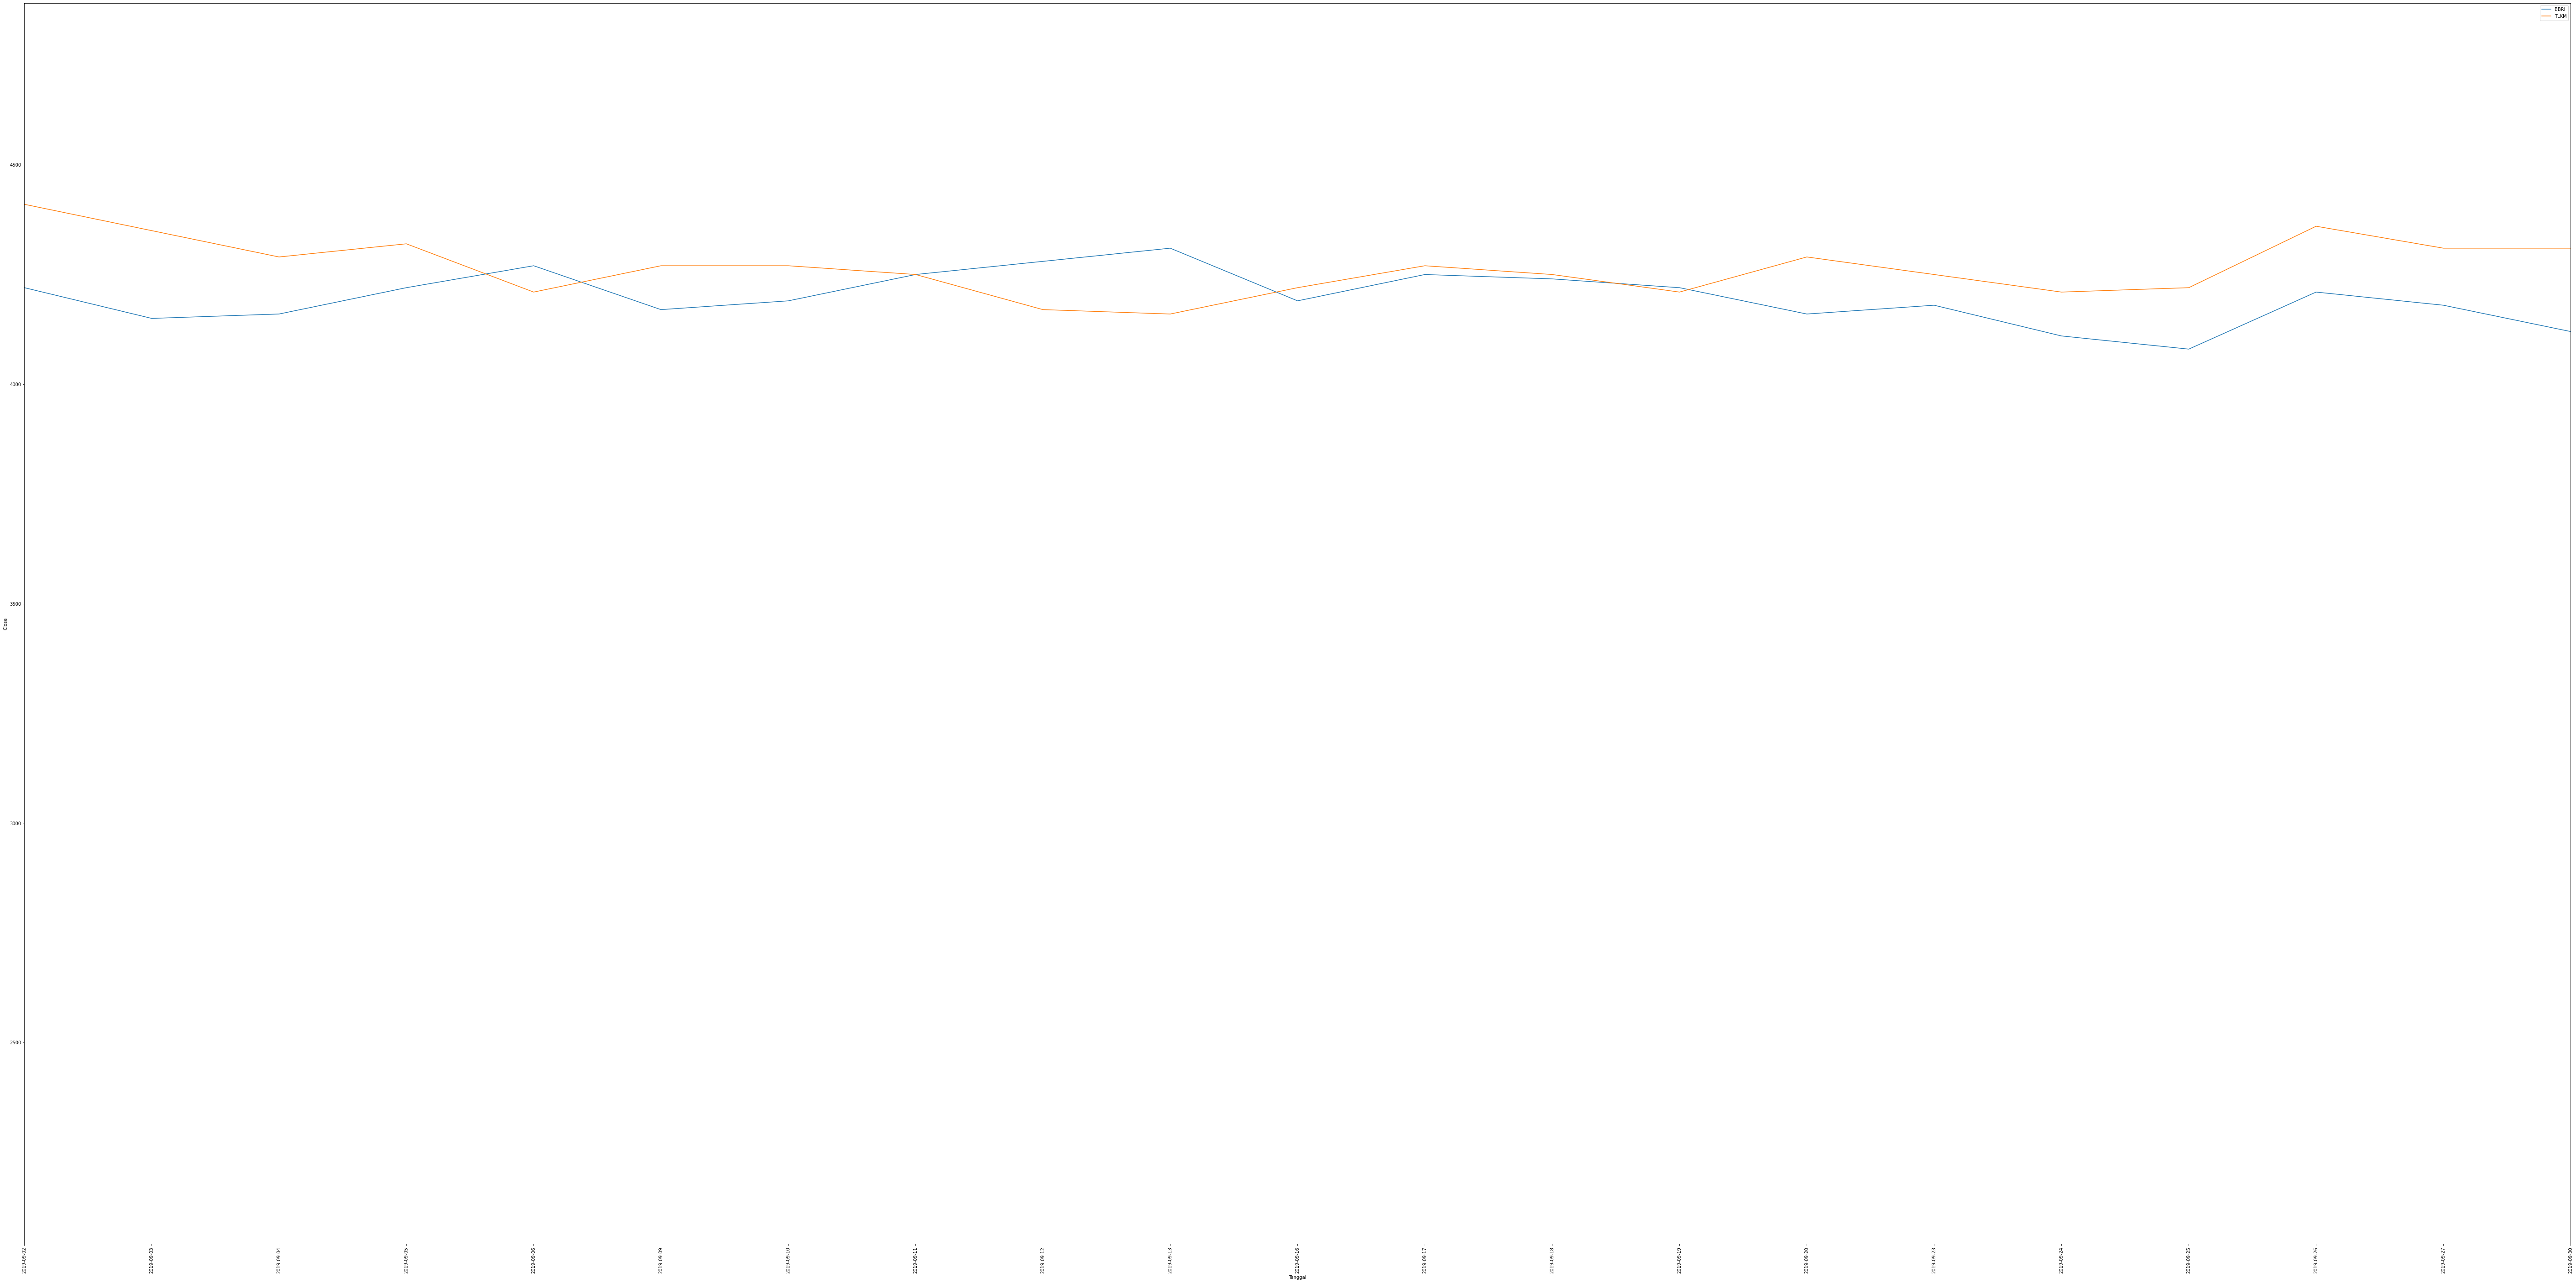

In [ ]:
import matplotlib.pyplot as plt
#bandingin perusahaan bluechip (fundamental paling raksasa)
#KODE SAHAM : BBRI , TLKM, etc
print("Comparison")
input_Kode_Saham1 =str(input("Kode Saham 1 : "))
input_Kode_Saham2 =str(input("Kode Saham 2 : "))
data_kode1 = data[data.Code == input_Kode_Saham1]
data_kode2 = data[data.Code == input_Kode_Saham2]
#Rentang
plt.figure(figsize=(100, 50))
plt.plot(data_kode1.Tanggal,data_kode1.Close)
plt.plot(data_kode2.Tanggal,data_kode2.Close)
plt.legend([input_Kode_Saham1,input_Kode_Saham2])
plt.xlim([0, 20]) 
plt.xlabel('Tanggal')
plt.ylabel('Close')
plt.xticks(rotation=90)


plt.show

In [ ]:
plt.savefig('test.png')

<Figure size 432x288 with 0 Axes>

----------------------------------------------------------------------------------------------------------------------------------------------------------

**ALTERNATIVE CASE SCENARIO** lebih rapi lagi sistemnya

----------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
def deteksi_data(tanggal):
  list_url_20192020 = []
  alamat = "http://www.duniainvestasi.com/bei/prices/daily/"+tanggal
  response=requests.get(alamat)
  data_html = BeautifulSoup(response.text, 'html.parser')
  tabel_stocks = data_html.find('table')
  if len(data_html.find_all("table")) > 0:
    list_url_20192020.append(alamat)
  
  return list_url_20192020

In [ ]:
#MAIN

start_date = date(2019, 9, 1) #tanggal awal
end_date = date(2019, 10, 1) #tanggal akhir
for single_date in daterange(start_date, end_date):
    tanggal = single_date.strftime("%Y%m%d")
    test = deteksi_data(tanggal)
    dapat_data = get_data(test)


Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20190902/page:1 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20190902/page:2 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20190902/page:3 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20190902/page:4 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20190902/page:5 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20190902/page:6 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20190902/page:7 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20190902/page:8 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20190902/page:9 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20190902/page:10 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/daily/20190902/page:11 
Berhasil kumpul data http://www.duniainvestasi.com/bei/prices/d

In [ ]:


def get_data(list_url):
  KumpulanData = []
  for i in list_url:
    no_pages = get_nopages(i)
    for z in range(no_pages): #no_pages
      alamat = i+"/page:"+str(z+1)
      alamatpisah = alamat.split('/')
      tanggal = alamatpisah[6]
      e = '(\d{4})(\d{2})(\d{2})'
      tanggalfix = '{}-{}-{}'.format(*re.search(e, alamatpisah[6]).groups())
      response=requests.get(alamat)
      data_html = BeautifulSoup(response.text, 'html.parser')
      tabel_stocks = data_html.find('table')
      df=pd.read_html(str(tabel_stocks))
      df=pd.DataFrame(df[0],columns=['Code','Close'])
      df['Tanggal'] = tanggalfix
      KumpulanData.append(df)
      print("Berhasil kumpul data {} ".format(alamat))
 

In [ ]:
#Pertama kumpul tanggal2 
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

**BELAJAR MANDIRI**

In [ ]:
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from matplotlib import dates as mdate

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
# x_vals = [0,1,2,3,4,5]
# y_vals = [0,1,3,2,3,5]

In [ ]:
%matplotlib notebook
from matplotlib import rc
rc('animation', html='jshtml')

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 951, in _start
    self._init_draw()
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1743, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1766, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-22-75d41045a428>", line 15, in animate
    ax1.set_ylim([min(y1.iloc[0]),max(y1.iloc[-1])])
TypeError: 'numpy.float64' object is not iterable


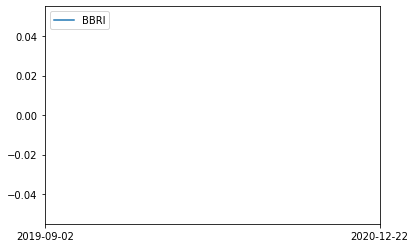

In [ ]:
x=[]
y1=[]
data_kode1 = data[data.Code == 'BBRI']
x = data_kode1['Tanggal']
y1 = data_kode1['Close']

fig = plt.figure()
ax1 = fig.add_subplot(111)

def animate(i):
  ax1.clear()
  ax1.plot(x[:i],y1[:i], label='BBRI')
  ax1.legend(loc = 'upper left')
  ax1.set_xlim([x.iloc[0],x.iloc[-1]])
  ax1.set_ylim([min(y1.iloc[0]),max(y1.iloc[-1])])
  ax1.xaxis.set_major_locator(mdate.DayLocator(interval = 5))


# ani=FuncAnimation(plt.gcf(),animate,interval=1000)
# plt.tight_layout()
# plt.show()

# data_kode1 = data[data.Code == 'BBRI']
# x = data_kode1['Tanggal']
# y1 = data_kode1['Close']
# print(x.shape)
# y1.shape

ani = animation.FuncAnimation(fig, animate, interval = 1000)
plt.show()

In [ ]:
ani

In [ ]:
pip install yfinance


     |████████████████████████████████| 5.5MB 7.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=aab162f06969ff9c650a69402e645cf519e20851184c28c634b72245e5b64454
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

# loading the data
indices = ["^GSPC","TLT", ]
data = yf.download(indices,start='2020-01-01')
inv_growth = (data.pct_change().dropna() + 1).cumprod()

# plotting the data

fig, ax = plt.subplots()

ax.set_xlim(inv_growth.index[0], inv_growth.index[-1])
ax.set_ylim(0.940, 1.100)

line1, = ax.plot([], [])
line2, = ax.plot([], [])


def animation_frame(i):
    temp = inv_growth.iloc[:i]
    line1.set_data(temp.index, temp[0])
    line2.set_data(temp.index, temp[1])

    return line1,line2,

animation = FuncAnimation(fig, 
                          func=animation_frame, 
                          frames=range(inv_growth.index.size),
                          interval = 100)
plt.show()

[*********************100%***********************]  2 of 2 completed


<IPython.core.display.Javascript object>